In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn  as sns
import geopandas as gpd
import fiona
import shapely
import matplotlib as mpl
from statannotations.Annotator import Annotator
from statannotations.stats.StatTest import StatTest
import pickle
from shapely.geometry import Point, MultiPoint
import scipy
from shapely import wkt
import statsmodels.api as sm


In [2]:
from shapely.geometry import Polygon

In [3]:
from pygam import LogisticGAM, s, te

In [4]:
from functools import reduce
from operator import add


In [5]:
import libpysal

In [6]:
import esda

In [7]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.size': 16})

#### Load datasets

In [8]:
gdf=gpd.read_file("../Data/Socio_economic_data.geojson")

In [9]:
# import France outline
fr_outline=gpd.read_file("../Maps/france_outline.geojson")

In [11]:
# import Allodiality data
allodiality=gpd.read_file("../Data/Allodiality_data.geojson")

In [25]:
# import prices
prices=gpd.read_file("../Data/Price_data.geojson")

#### Plots and statistical analysis

##### Association with population: restricted to towns (more than 2000 inhabitants)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No vs. Yes: T Test, P_val:3.234e-36 Stat=-1.279e+01


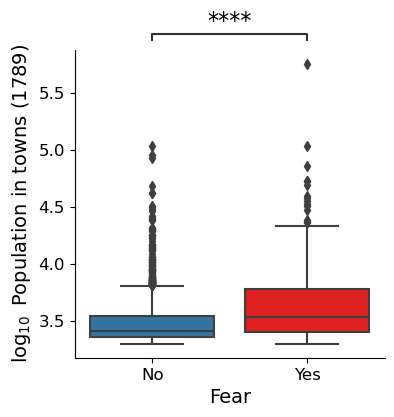

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax=sns.boxplot(data=gdf[gdf.Town], x="Fear", y="logP", order=["No","Yes"], palette=["tab:blue","red"])
pairs=[("No","Yes")]
annotator = Annotator(ax, pairs, data=gdf[gdf.Town], x="Fear", y="logP", order=["No","Yes"])
# Required descriptors for annotate
custom_long_name = 'T Test'
custom_short_name = 'T Test'
custom_func = scipy.stats.ttest_ind
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)
annotator.configure(test=custom_test, text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.ylabel(r"$\log_{10}$ Population in towns (1789)")
plt.show()

##### Plot map

(100000.0, 1120000.0)

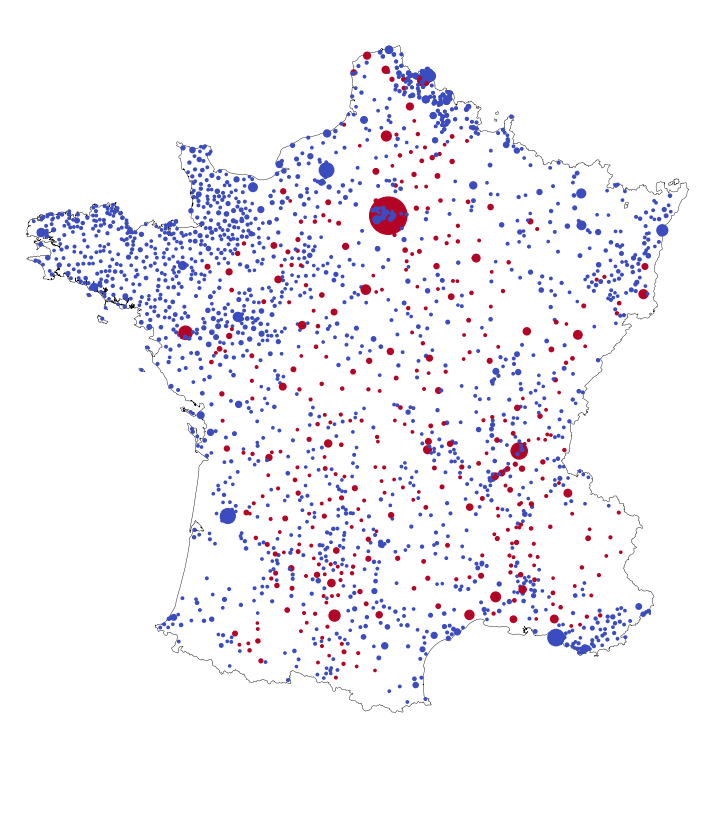

In [27]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
fr_outline.plot(facecolor="white", edgecolor='black', lw=0.3, ax=ax)
gdf[gdf.Town].plot(column="Fear", marker=".", ax=ax, cmap="coolwarm", s=gdf[gdf.Town]['poptot']/200)
plt.xlim(0.1e6,1.12e6)

##### Correlation with the participation in the 1789 referendum (towns with more than 2000 inhabitants)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No vs. Yes: T Test, P_val:8.182e-02 Stat=-1.741e+00


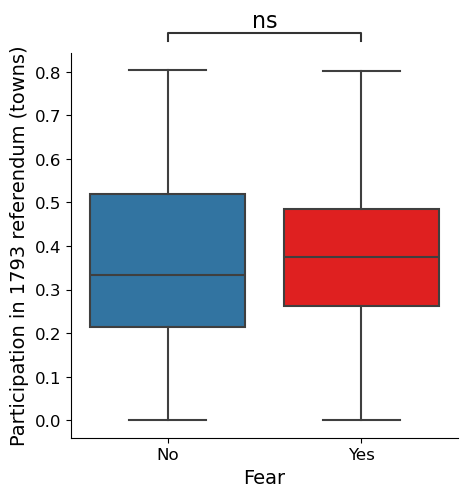

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax=sns.boxplot(data=gdf[gdf.Town], x="Fear", y="ppar", order=["No","Yes"], palette=["tab:blue","red"])
pairs=[("Yes","No")]
annotator = Annotator(ax, pairs, data=gdf[gdf.Town], x="Fear", y="ppar", order=["No","Yes"])
# Required descriptors for annotate
custom_long_name = 'T Test'
custom_short_name = 'T Test'
custom_func = scipy.stats.ttest_ind
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)
annotator.configure(test=custom_test, text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.ylabel(r"Participation in 1793 referendum (towns)")
plt.show()

##### Association with literacy (towns with more than 2000 inhabitants)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Yes vs. No: T Test, P_val:4.890e-08 Stat=5.474e+00


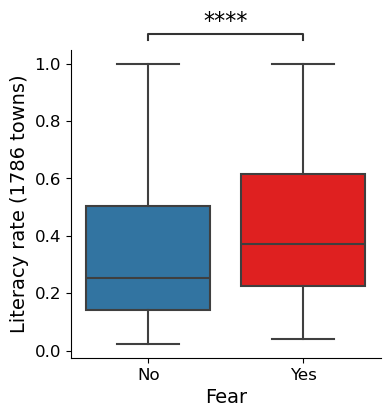

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax=sns.boxplot(data=gdf[gdf.Town], x="Fear", y="% signed", order=["No","Yes"], palette=["tab:blue","red"])
pairs=[("Yes","No")]
annotator = Annotator(ax, pairs, data=gdf[gdf.Town], x="Fear", y="% signed")
# Required descriptors for annotate
custom_long_name = 'T Test'
custom_short_name = 'T Test'
custom_func = scipy.stats.ttest_ind
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)
annotator.configure(test=custom_test, text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.ylabel("Literacy rate (1786 towns)")
plt.show()

In [30]:
# literacy rate (averaged)
(gdf.poptot*gdf["% signed"]).sum()/gdf.poptot.sum()

0.3391083509506362

In [31]:
# literacy rate (averaged)
(gdf[gdf.Town].poptot*gdf[gdf.Town]["% signed"]).sum()/gdf[gdf.Town].poptot.sum()

0.46423764362726655

##### Association with income (towns of more than 2000 inhabitants)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Yes vs. No: T Test, P_val:7.946e-04 Stat=3.359e+00


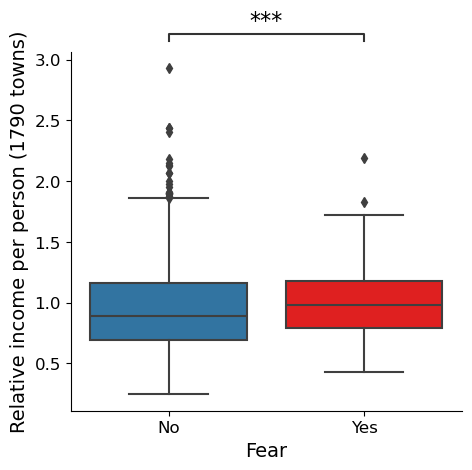

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax=sns.boxplot(data=gdf[gdf.Town], x="Fear", y="revratio1790", order=["No","Yes"], palette=["tab:blue","red"])
pairs=[("Yes","No")]
annotator = Annotator(ax, pairs, data=gdf[gdf.Town], x="Fear", y="revratio1790")
# Required descriptors for annotate
custom_long_name = 'T Test'
custom_short_name = 'T Test'
custom_func = scipy.stats.ttest_ind
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)
annotator.configure(test=custom_test, text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.ylabel("Relative income per person (1790 towns)")
plt.tight_layout()
plt.show()

##### Association with ownership (towns of more than 2000 inhabitants)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Yes vs. No: T Test, P_val:1.136e-16 Stat=-8.354e+00


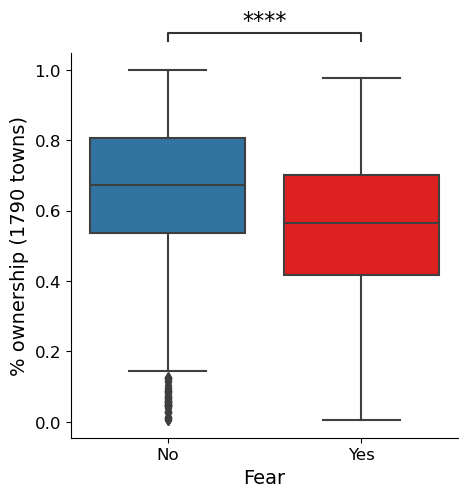

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax=sns.boxplot(data=gdf[gdf.Town], x="Fear", y="perpropri1790", order=["No","Yes"], palette=["tab:blue","red"])
pairs=[("Yes","No")]
annotator = Annotator(ax, pairs, data=gdf[gdf.Town], x="Fear", y="perpropri1790")
# Required descriptors for annotate
custom_long_name = 'T Test'
custom_short_name = 'T Test'
custom_func = scipy.stats.ttest_ind
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)
annotator.configure(test=custom_test, text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.ylabel("% ownership (1790 towns)")
plt.show()

##### Association with wheat prices (towns)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Yes vs. No: T Test, P_val:1.406e-19 Stat=9.137e+00


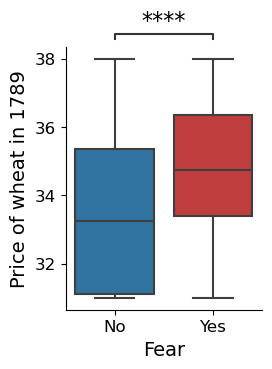

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(3, 4))
ax=sns.boxplot(data=gdf[gdf.Town==True], x="Fear", y="price_1789", order=["No","Yes"], palette=["tab:blue","tab:red"])
pairs=[("Yes","No")]
annotator = Annotator(ax, pairs, data=gdf[gdf.Town==True], x="Fear", y="price_1789")
# Required descriptors for annotate
custom_long_name = 'T Test'
custom_short_name = 'T Test'
custom_func = scipy.stats.ttest_ind
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)
annotator.configure(test=custom_test, text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.ylabel("Price of wheat in 1789")
plt.tight_layout()
plt.show()

##### Association with price differences (towns)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Yes vs. No: T Test, P_val:9.880e-01 Stat=-1.500e-02


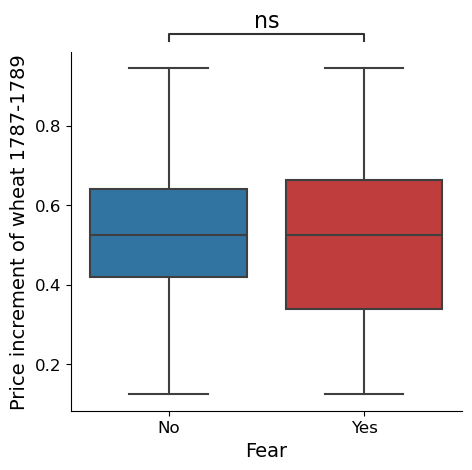

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax=sns.boxplot(data=gdf[gdf.Town==True], x="Fear", y="price_increment", order=["No","Yes"], palette=["tab:blue","tab:red"])
pairs=[("Yes","No")]
annotator = Annotator(ax, pairs, data=gdf[gdf.Town==True], x="Fear", y="price_increment")
# Required descriptors for annotate
custom_long_name = 'T Test'
custom_short_name = 'T Test'
custom_func = scipy.stats.ttest_ind
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)
annotator.configure(test=custom_test, text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.ylabel("Price increment of wheat 1787-1789")
plt.tight_layout()
plt.show()

(100000.0, 1120000.0)

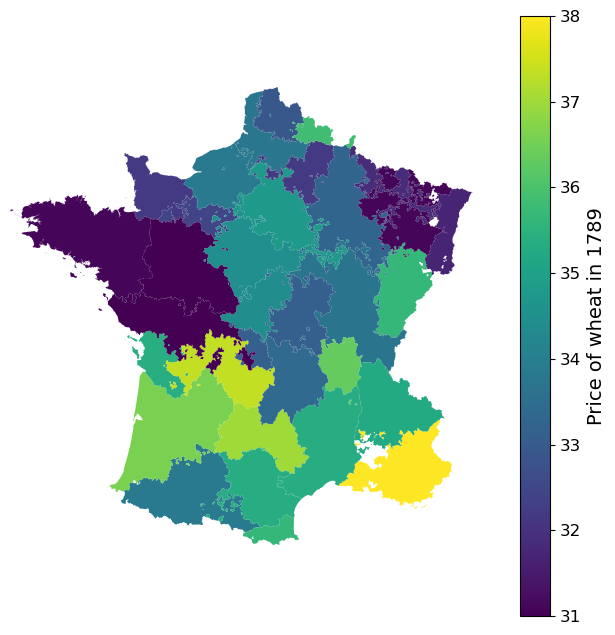

In [36]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
prices.plot(column="price_1789", legend=True, ax=ax, legend_kwds={"label": "Price of wheat in 1789"})
plt.xlim(0.1e6,1.12e6)

#### Allodiality

In [37]:
contingency = pd.crosstab(gdf[gdf.Town]['Alodiality'], gdf[gdf.Town]['Fear'])

In [38]:
contingency

Fear,No,Yes
Alodiality,,
NAST,902,161
NSST,599,213
NTSS,345,11


In [39]:
fractions=100*contingency["Yes"]/(contingency["Yes"]+contingency["No"])

In [40]:
df_fr=pd.DataFrame(fractions.reset_index())

In [41]:
df_fr.columns=["Allodiality","% of towns with fear"]

In [42]:
my_colors=["yellow","red","tab:green"]

(0.0, 33.23152709359606)

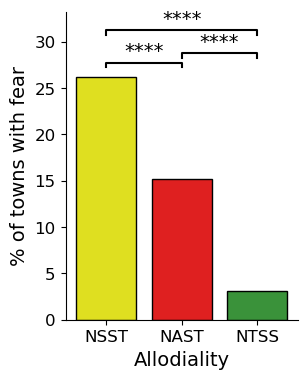

In [43]:
fig = plt.figure(figsize=(3,4))
ax=sns.barplot(data=df_fr,x="Allodiality", y="% of towns with fear", palette=my_colors, edgecolor="black", order=["NSST","NAST","NTSS"])
# Coordinates for annotations
bar_centers = [p.get_x() + p.get_width() / 2 for p in ax.patches]
bar_heights = [p.get_height() for p in ax.patches]

# Offsets for the significance bars
bar_offset = 1.0
line_height = 0.5

def annotate_sig(ax, x1, x2, y, h, text):
    """Draws a significance bar between two bars with an asterisk."""
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    ax.text((x1 + x2) / 2, y + h + 0.2, text, ha='center', va='bottom', fontsize=14)
# A vs B
annotate_sig(ax, bar_centers[0], bar_centers[1], max(bar_heights) + bar_offset, line_height, '****')
# B vs C
annotate_sig(ax, bar_centers[1], bar_centers[2], max(bar_heights) + bar_offset + 1., line_height, '****')
# A vs C
annotate_sig(ax, bar_centers[0], bar_centers[2], max(bar_heights) + bar_offset + 3.5, line_height, '****')
plt.ylim(0, max(bar_heights) + bar_offset + 6)  # make room for annotations

<Axes: >

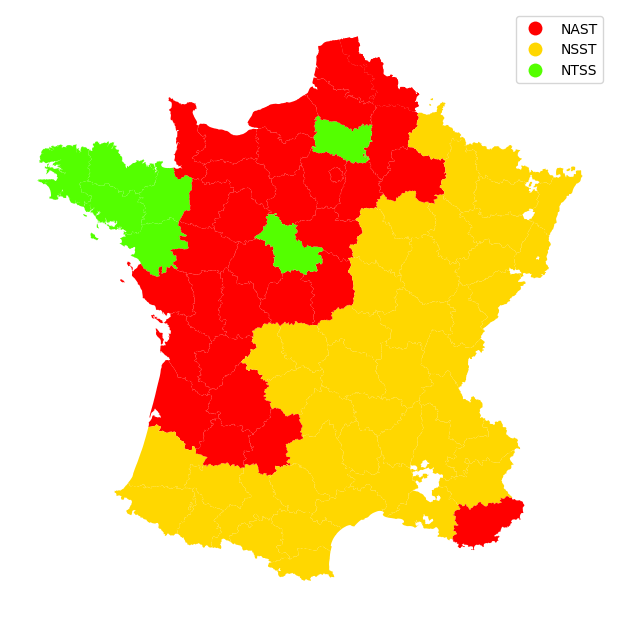

In [162]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
allodiality.plot(column="Alodiality", ax=ax, cmap="prism", legend=True)
#plt.savefig("alod.pdf")

#### Multiple logistic regression

In [44]:
df1=gdf[gdf.Town][["logP","revratio1790","perpropri1790","% signed",'ppar',"Fear",'price_1789', 'price_increment','Alodiality']].dropna()

In [45]:
df1

,logP,revratio1790,perpropri1790,% signed,ppar,Fear,price_1789,price_increment,Alodiality
2,3.393575,0.814954,0.569873,0.287161,0.450450,Yes,33.70,0.524887,NSST
21,3.339650,0.731692,0.674765,0.102313,0.380952,No,33.70,0.524887,NSST
29,3.531096,0.690321,0.043880,0.266890,0.313000,No,33.70,0.524887,NSST
30,3.566320,0.793435,0.524461,0.343534,0.508536,Yes,33.70,0.524887,NSST
32,3.331225,0.916296,0.958527,0.233218,0.507716,No,33.70,0.524887,NSST
...,...,...,...,...,...,...,...,...,...
34567,3.838030,1.230711,0.009508,0.909525,0.204883,No,34.75,0.662679,NAST
34574,3.640779,0.859197,0.034347,0.629606,0.204678,Yes,34.75,0.662679,NAST
34575,3.345962,0.952954,0.027254,0.740802,0.204283,No,34.75,0.662679,NAST
34746,3.478711,1.361453,0.470904,1.000000,0.327078,Yes,34.75,0.662679,NAST


In [46]:
def NSST(x):
    if x=="NSST":
        allod=1
    else:
        allod=0
    return allod

In [47]:
def binarize_fear(x):
    if x=="Yes":
        fear=1
    else:
        fear=0
    return fear

In [48]:
df1.Fear=df1.Fear.apply(lambda x: binarize_fear(x))

In [49]:
df1["NSST"]=df1.Alodiality.apply(lambda x: NSST(x))

In [50]:
X=df1[['logP', 'revratio1790', 'perpropri1790', '% signed', 'ppar',"price_1789","price_increment", "NSST"]]
Y=df1["Fear"]

In [51]:
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(Y, X)
result = model.fit(method='bfgs', maxiter=500)


# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.407468
         Iterations: 78
         Function evaluations: 81
         Gradient evaluations: 81
                           Logit Regression Results                           
Dep. Variable:                   Fear   No. Observations:                 2071
Model:                          Logit   Df Residuals:                     2062
Method:                           MLE   Df Model:                            8
Date:                Mon, 12 May 2025   Pseudo R-squ.:                  0.1332
Time:                        14:54:34   Log-Likelihood:                -843.87
converged:                       True   LL-Null:                       -973.55
Covariance Type:            nonrobust   LLR p-value:                 1.773e-51
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -17.9460  

In [52]:
# Get odds ratios
odds_ratios = np.exp(result.params)
# Get 95% CI
conf = result.conf_int()
conf.columns = ['2.5%', '97.5%']
conf_exp = np.exp(conf)
# Combine into a single table
summary_table = pd.concat([odds_ratios, conf_exp], axis=1)
summary_table.columns = ['Odds Ratio', '2.5%', '97.5%']
print(summary_table)


                   Odds Ratio          2.5%         97.5%
const            1.607450e-08  5.568513e-10  4.640188e-07
logP             6.984488e+00  4.127608e+00  1.181873e+01
revratio1790     1.581801e+00  1.001812e+00  2.497571e+00
perpropri1790    6.175667e-01  3.211553e-01  1.187552e+00
% signed         1.791382e+00  1.059967e+00  3.027502e+00
ppar             9.831342e-01  5.023851e-01  1.923928e+00
price_1789       1.281904e+00  1.196333e+00  1.373596e+00
price_increment  1.831833e+00  8.738618e-01  3.839980e+00
NSST             2.260555e+00  1.730871e+00  2.952335e+00


In [54]:
print(result.pvalues)

const              1.319268e-25
logP               4.401323e-13
revratio1790       4.909904e-02
perpropri1790      1.485398e-01
% signed           2.944449e-02
ppar               9.603961e-01
price_1789         1.846208e-12
price_increment    1.089528e-01
NSST               2.131467e-09
dtype: float64


#### Control for geography

In [55]:
y_pred = result.predict(X)

In [56]:
pearson_residuals = (Y - y_pred) / np.sqrt(y_pred * (1 - y_pred))

In [57]:
gdf2=gdf[gdf.Town==True][['geometry',"logP","revratio1790","perpropri1790","% signed",'ppar',"Fear", "price_1789","price_increment", "Alodiality"]]

In [58]:
gdf2.Fear=gdf2.Fear.apply(lambda x: binarize_fear(x))

In [59]:
gdf2["NSST"]=gdf2.Alodiality.apply(lambda x: NSST(x))

In [60]:
gdf2=gdf2.dropna()

In [61]:
gdf2["res"]=pearson_residuals

In [62]:
gdf2=gdf2[["geometry","res"]]

In [63]:
coords = list(zip(gdf2.geometry.x, gdf2.geometry.y))
# Define maximum distance for neighbors (you must pick a reasonable threshold)
threshold = 10000  # in the units of your CRS; adjust accordingly!
w = libpysal.weights.DistanceBand(coords, threshold=threshold, binary=True, silence_warnings=True)


In [64]:
# Calculate Moran's I
moran = esda.Moran(gdf2['res'], w)
# Output the results
print(f"Moran's I: {moran.I}")
print(f"P-value: {moran.p_sim}")

Moran's I: 0.10673137014341653
P-value: 0.001


#### Adjust for geographic variations

In [65]:
gdf1=gdf[gdf.Town==True][['geometry',"Alodiality","logP","revratio1790","perpropri1790","% signed",'ppar',"Fear", "price_1789","price_increment"]]

In [66]:
gdf1.Fear=gdf1.Fear.apply(lambda x: binarize_fear(x))

In [67]:
gdf1["NSST"]=gdf1.Alodiality.apply(lambda x: NSST(x))

In [68]:
gdf1["lat"]=gdf1["geometry"].y
gdf1["lon"]=gdf1["geometry"].x

In [69]:
gdf1=gdf1.dropna()

In [70]:
X=gdf1[['logP', 'revratio1790', 'perpropri1790', '% signed', 'ppar',"price_1789","price_increment", "NSST", "lat","lon"]]
Y=gdf1["Fear"].astype(float)

In [71]:
# Make sure y is 1D array
y_array = Y.values.ravel()



In [72]:
# Get number of columns (predictors + lon + lat)
n_features = X.shape[1]


In [73]:
# Indices of longitude and latitude
lon_idx = X.columns.get_loc('lon')
lat_idx = X.columns.get_loc('lat')

In [74]:
# 1. Create a list of terms first
terms = []

# 2. Add smooth terms for normal predictors
for i in range(X.shape[1]):
    if i not in [lon_idx, lat_idx]:
        terms.append(s(i))  # smooth each non-spatial feature

# 3. Add 2D spatial smoother
terms.append(te(lon_idx, lat_idx))


In [75]:
# 4. Combine terms correctly (sum them up with +)


combined_terms = reduce(add, terms)

# 5. Fit the model
gam = LogisticGAM(combined_terms, lam=1).fit(X.values, y_array)



In [76]:
print(gam.summary())



LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     64.1179
Link Function:                        LogitLink Log Likelihood:                                  -620.1473
Number of Samples:                         2071 AIC:                                             1368.5305
                                                AICc:                                            1372.8255
                                                UBRE:                                               2.6856
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.363
Feature Function                  Lam

/var/folders/jy/mpqy4_yn7k50zgjy8wz8th6r0000gp/T/ipykernel_33256/2887040634.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


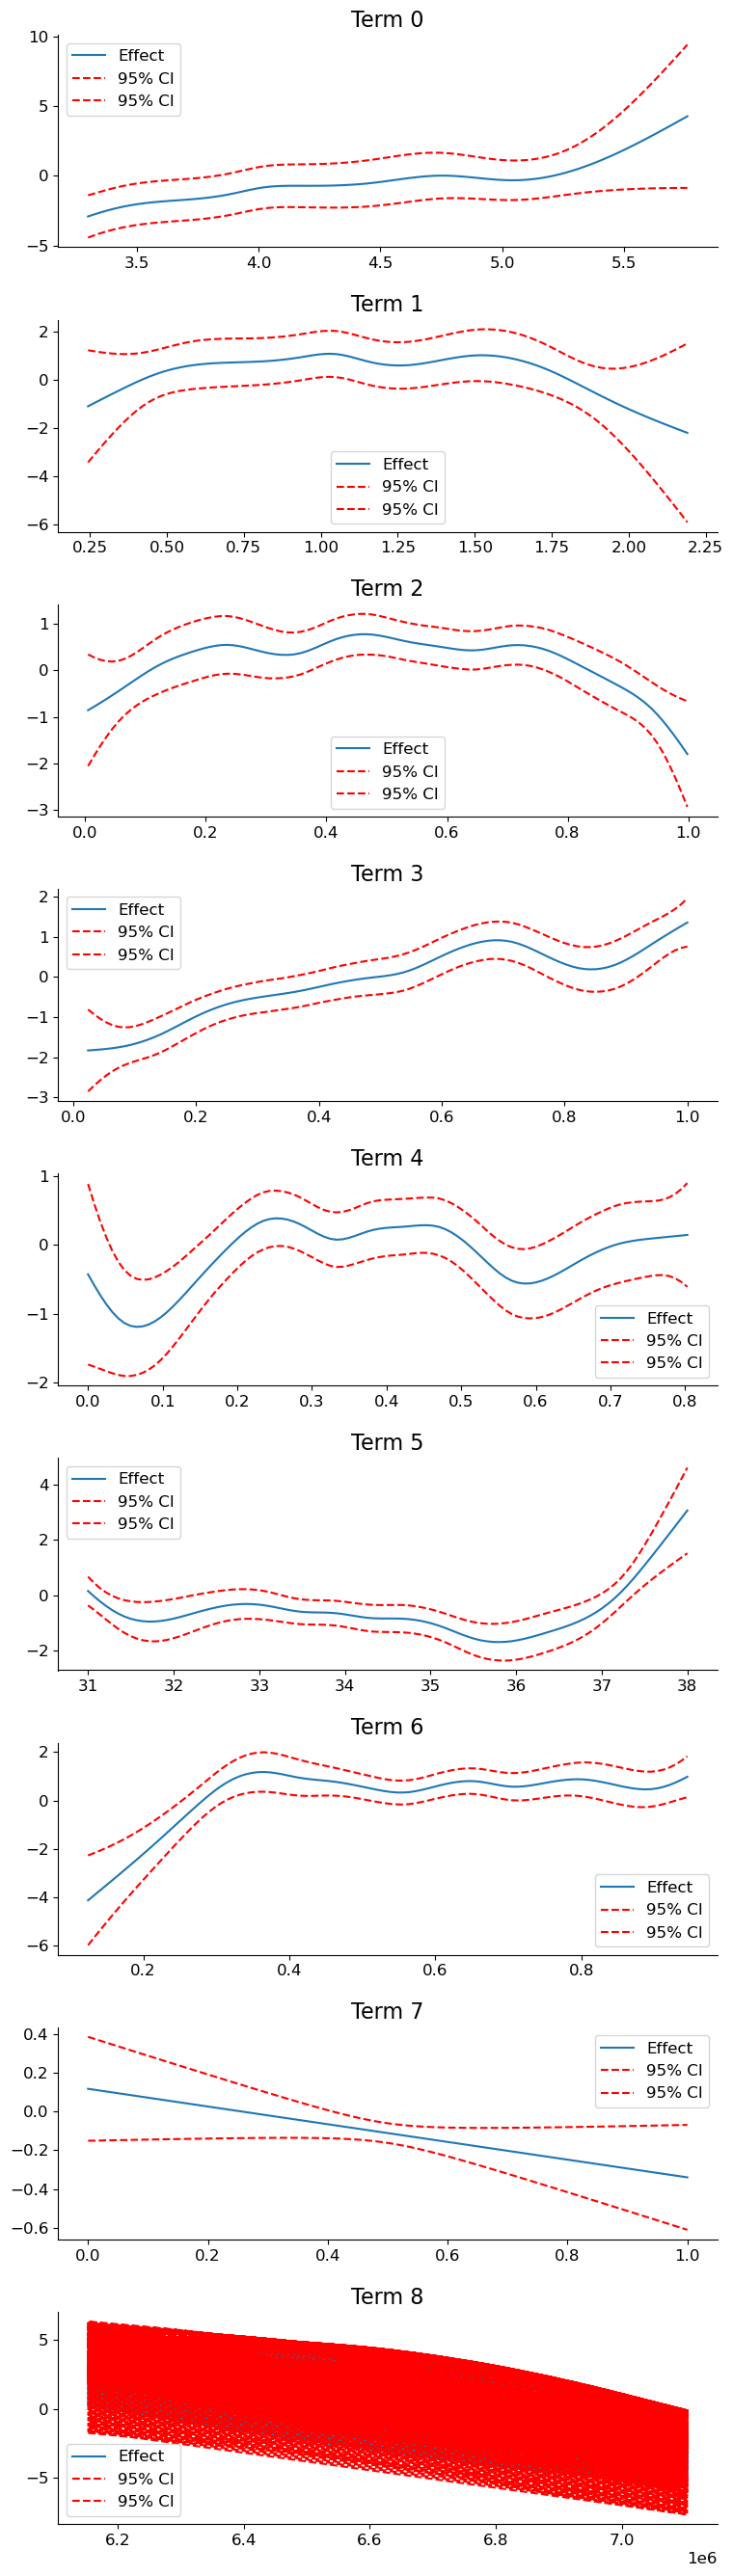

In [77]:
# Get term indices for non-intercept terms
term_indices = [i for i, t in enumerate(gam.terms) if not t.isintercept]

# Create subplots for each non-intercept term
fig, axs = plt.subplots(len(term_indices), 1, figsize=(8, len(term_indices) * 3))

if len(term_indices) == 1:
    axs = [axs]  # Make sure it's iterable

# Plot partial dependence and confidence intervals
for ax, i in zip(axs, term_indices):
    XX = gam.generate_X_grid(term=i)
    pdep = gam.partial_dependence(term=i, X=XX)
    conf = gam.partial_dependence(term=i, X=XX, width=0.95)

    ax.plot(XX[:, i], pdep, label='Effect')
    ax.plot(XX[:, i], conf[1], 'r--', label='95% CI')
    feature_names = X.columns
    ax.set_title(f'Term {i}')
    ax.legend()
plt.tight_layout()
plt.show()